# Applications of Accelerators 2023/2024

## Ex03

Q1- Assuming you are using the Diamond Light Source with the circumference of 561.6 [m], for 190 [AMeV] 238-U-28+ calculate:

A- [1 point] The magnetic rigidity

In [1]:
import numpy as np
c = 299792458 # [m/s]
e = 1.602e-19 # [C]

In [2]:
def get_gamma(TMeV, m_0_Mev_c2):
    return TMeV/m_0_Mev_c2 + 1

In [3]:
def get_beta(gamma):
    return np.sqrt(1-1/gamma**2)

In [4]:
def get_brho(gamma, m_0_Mev_c2, Q):
    return gamma * get_beta(gamma) * c * m_0_Mev_c2 * 1.66e-27 / 931.494 / Q / e

In [5]:
print(get_brho(get_gamma(238*190, 238*931.494), 238*931.494, 28), '[Tm]')

17.70415279139022 [Tm]


B- [1 point] Energy loss due to synchrotron radiation per turn

In [6]:
def get_delta_e(gamma, Q, rho):
    epsilon_0 = 8.854e-12 # [F/m]   
    beta = get_beta(gamma)
    print(f'gamma: {gamma}')
    print(f'beta: {beta}')
    return (Q*e)**2 * beta**3 * gamma**4 / 3 / epsilon_0 / rho

In [7]:
gamma = get_gamma(238*190, 238*931.494)
delta_e = get_delta_e(gamma, 28, 561.6 / 2 / np.pi)
print('delta_e: ', delta_e, '[J]')
print('delta_e: ', delta_e * 6.241509e18, '[eV]')

gamma: 1.2039734018683963
beta: 0.5568946573760044
delta_e:  3.0755288684902662e-27 [J]
delta_e:  1.9195941112441814e-08 [eV]


C- [1 point] Opening angle of synchrotron radiation in DEGREEs

In [8]:
def get_angle_degrees(gamma):
    return np.rad2deg(1/gamma)

In [9]:
print('Opening angle:', get_angle_degrees(gamma), '[°]')

Opening angle: 47.58890804744306 [°]


Q2- [3 point] Same as above, but for 410 [MeV/u] 197-Au-77+

In [10]:
gamma = get_gamma(197*410, 197*931.494)
delta_e = get_delta_e(gamma, 77, 561.6 / 2 / np.pi)
print('brho:', get_brho(gamma, 197*931.494, 77), '[Tm]')
print('delta_e: ', delta_e, '[J]')
print('delta_e: ', delta_e * 6.241509e18, '[eV]')
print('Opening angle:', get_angle_degrees(gamma), '[°]')

gamma: 1.440153130347592
beta: 0.7196175812953182
brho: 8.236680464372766 [Tm]
delta_e:  1.0273973883444641e-25 [J]
delta_e:  6.412510045928468e-07 [eV]
Opening angle: 39.78450506805033 [°]


Q3- [3 point] same as above but for 10 [GeV] electrons

In [11]:
gamma = get_gamma(10000, 0.511)
delta_e = get_delta_e(gamma, 1, 561.6 / 2 / np.pi)
print('brho:', get_brho(gamma, 0.511, 1), '[Tm]')
print('delta_e: ', delta_e, '[J]')
print('delta_e: ', delta_e * 6.241509e18, '[eV]')
print('Opening angle:', get_angle_degrees(gamma), '[°]')

gamma: 19570.471624266145
beta: 0.9999999986945284
brho: 33.35096531376305 [Tm]
delta_e:  1.5857042334469378e-12 [J]
delta_e:  9897187.244397163 [eV]
Opening angle: 0.0029276647294508317 [°]


 <font color='blue'>You can clearly see how large the synchrotron radiation due to the electrons are.</font>

Q4- [1 point] You usually need quadrupoles in synchrotrons and transfer lines otherwise you can not transport charged particles. How do people transport neutrons in the European Spallation Source (ESS) inside the pipes until they reach experiments?

 <font color='blue'>Neutrons can not be guided by magnets. Instead, pipes with polished inner surfaces are used to guide neutrons. Neutrons just bump / bounce until they reach the experimental place.</font>

Q5- [1 point] Write in your own words, what is the advantage of sub-critical reactors and how does an accelerator help with that?

<font color='blue'>Safer operation, since reaction is only driven by ion beams and burning of waste products to have lower half-lives. Also produces shorter lived radioactive waste.</font>

Q6- [1 point] Write in your own words, what is beta function?

 <font color='blue'>Beta function describes the envelope of all possible particle trajectories for every position around the accelerator structure. </font>

Q7- [1 point] Write in your own words, what is the Bragg peak in accelerator physics and where does it come from?

 <font color='blue'>When charged particles stop in matter, their collision cross section increases with decreasing energy so that shortly before stopping there is a peak energy transfer to the matter. This can be used for medical applications.</font>

Q8- [1 point] Write a python function with the name of "get_rigidity" to calculate the magnetic rigidity and put your code as usual on your GitHUB and provide the link here. Test your code with the results of the previous exercise!

Hint : please write as less code lines as possible by using advanced language features like the decorator "np.vectorize" and "class"

 <font color='blue'>look above please, or using vectorize:</font>

In [12]:
@np.vectorize
def get_rigidity(TMeV, m_0_Mev_c2, Q):
    gamma = TMeV/m_0_Mev_c2 + 1
    return gamma * get_beta(gamma) * c * m_0_Mev_c2 * 1.66e-27 / 931.494 / Q / e

In [13]:
# for a range of charge states of the above example for 330 [MeV/u] 197-Au-77+
get_rigidity(330*197, 197*931.494, np.arange(1,78))

array([558.89154694, 279.44577347, 186.29718231, 139.72288674,
       111.77830939,  93.14859116,  79.84164956,  69.86144337,
        62.09906077,  55.88915469,  50.80832245,  46.57429558,
        42.99165746,  39.92082478,  37.25943646,  34.93072168,
        32.87597335,  31.04953039,  29.41534458,  27.94457735,
        26.61388319,  25.40416122,  24.29963248,  23.28714779,
        22.35566188,  21.49582873,  20.69968692,  19.96041239,
        19.27212231,  18.62971823,  18.02875958,  17.46536084,
        16.93610748,  16.43798667,  15.96832991,  15.52476519,
        15.10517694,  14.70767229,  14.33055249,  13.97228867,
        13.63150114,  13.30694159,  12.99747784,  12.70208061,
        12.41981215,  12.14981624,  11.89130951,  11.64357389,
        11.40594994,  11.17783094,  10.95865778,  10.74791436,
        10.54512353,  10.34984346,  10.16166449,   9.9802062 ,
         9.80511486,   9.63606115,   9.47273808,   9.31485912,
         9.16215651,   9.01437979,   8.8712944 ,   8.73

 <font color='blue'>You can see the effect of the charge state on magnetic rigidity.</font>

Q9- [1 point] From the accelerator department, you received some data (see the attached data file: 2016-07-11_ipm_data.txt) from an ionisation beam profile monitor (IPM). Read the file and plot it in blue color on a black grid background. The mark the maximum with a red dot! Code and plot (PNG) as usual on GitHUB.

- Hint 1: The program is really short! Use np.genfromtext, matplotlib, savefig etc...
- Hint 2: please do not do magic while programming! There is always a command that can actually do what you are planing to do, just use it. Search internet please.


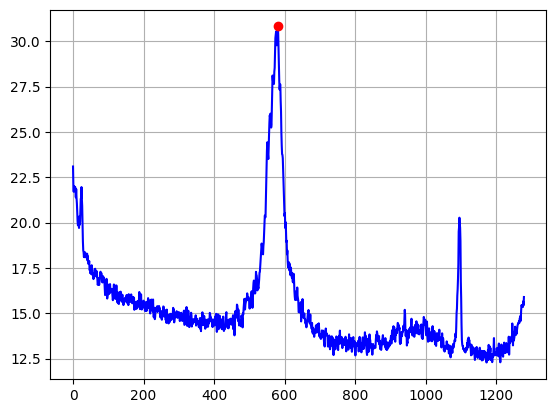

In [14]:
import matplotlib.pyplot as plt

filename = '2016-07-11_ipm_data.txt'
data = np.genfromtxt(filename)

plt.plot(data, 'b')
plt.plot(np.argmax(data), np.max(data), 'ro')
plt.grid(True)
plt.savefig(filename+'.png')